# SDPF-MU BGT distribution

I calculated the total BGT distribution of the $^{29}F(5/2^+)$ decay to $^{29}Ne(3/2^+,5/2+,7/2+)$ using the SDPF-MU interaction (at $4\hbar\omega$) and the block extension method to calculate 200 states of each spin parity.

As per usual we initialize Julia packages here

In [1]:
# include("/Users/mmadurga/.julia/dev/BetaDecayUtils/src/BetaDecayUtils.jl")
using Plots,DelimitedFiles,CSV,DataFrames,BetaDecayUtils

The ground state of  $^{29}Ne(3/2-)$ and the $^{29}F$ $Q_{\beta}$ value are

In [2]:
quenching = 0.77^2

Ex29Ne3n = -94.356; Ex29F5p = -69.579;
Qb = 21.8

QbSM = Ex29F5p + ecoulomb(9,20) - (Ex29Ne3n) - ecoulomb(10,19) + 0.78; display(QbSM)

t12=3.11e-3

22.14871700104261

0.00311

## BGT strength

Raw BGT strength for each decay path.

In [3]:
bgt3p = readdlm("data/bgt3p4julia.txt",header=true)
bgt5p = readdlm("data/bgt5p4julia.txt",header=true)
bgt7p = readdlm("data/bgt7p4julia.txt",header=true)

# bgt = Array{Float64,2}(undef,200,2)
bgt=[ 
    bgt3p[1][:,3] bgt3p[1][:,10].*quenching strip.(bgt3p[1][:,1],'(')
    bgt5p[1][:,3] bgt5p[1][:,10].*quenching strip.(bgt5p[1][:,1],'(')
    bgt7p[1][:,3] bgt7p[1][:,10].*quenching strip.(bgt7p[1][:,1],'(')
    ]

bgtsorted = bgt[sortperm(bgt[:,1]),:];

writedlm("sdpf-mu_F29-bgt.txt",["# Ex(MeV)"  "BGT(1/MeV)" "J*2" ])
    open("sdpf-mu_F29-bgt.txt", "a") do io
        writedlm(io,[round.(bgtsorted[:,1].-Ex29Ne3n,digits=6) round.(bgtsorted[:,2],digits=6) bgtsorted[:,3]])
    end   


Here we plot the SDPF-MU BGT without the 0.75 quenching, to be consistent with the Ikeda sum rule. Any other plot after this includes the quenching factor.

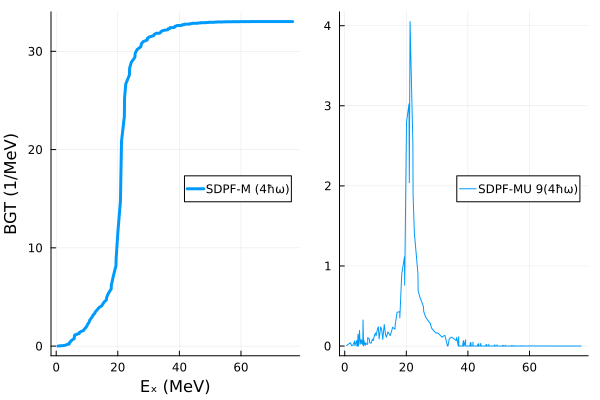

Ikeda sum rule 33 sdpf-mu 33.030299999999926

In [4]:
display(plot(plot(bgtsorted[:,1].-Ex29Ne3n,cumsum(bgtsorted[:,2]./quenching),
lw=3,xlabel="Eₓ (MeV)",ylabel="BGT (1/MeV)",label="SDPF-M (4ħω)"),legend=:right,
plot(bgtsorted[:,1].-Ex29Ne3n,bgtsorted[:,2]/quenching,label="SDPF-MU 9(4ħω)")))

print("Ikeda sum rule ", 3*(20-9)," sdpf-mu ",sum(bgtsorted[:,2])/quenching)

We can calculate the halflife and branching ratios in SDPF-MU

0.0015815293518961207

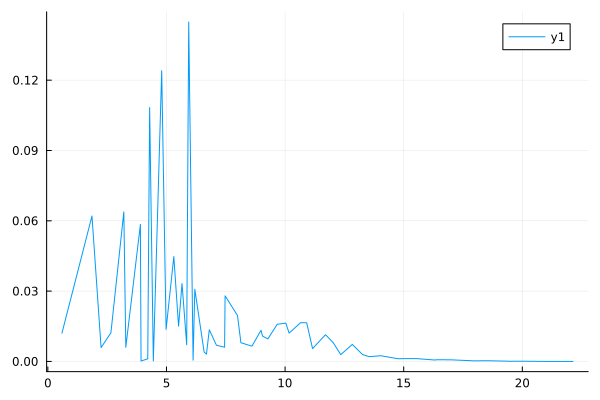

0.9879435376715411

In [5]:
t12SM = calculateT12(9,QbSM,bgtsorted[:,1].-Ex29Ne3n,bgtsorted[:,2]); display(t12SM)
Iᵦ =[ bgtsorted[bgtsorted[:,1].-Ex29Ne3n.<QbSM,1].-Ex29Ne3n calculateIb(9,QbSM,bgtsorted[:,1].-Ex29Ne3n,bgtsorted[:,2]) bgtsorted[bgtsorted[:,1].-Ex29Ne3n.<QbSM,3] ]

pp=plot(Iᵦ[:,1],Iᵦ[:,2])
#=pp=plot!(Iᵦ[:,1],parse.(Float64,Iᵦ[:,3])/100,line=false,marker=true)=#; display(pp)



display(sum(Iᵦ[Iᵦ[:,1].>1,2]))# sum(Iᵦ[Iᵦ[:,1].>1 .&& Iᵦ[:,1].<5,2])

writedlm("sdpf-mu_F29-Ib.txt",["# Ex(MeV)"  "Ib" " J*2"])
    open("sdpf-mu_F29-Ib.txt", "a") do io
        writedlm(io,[round.(Iᵦ[:,1],digits=6) round.(Iᵦ[:,2],digits=6) Iᵦ[:,3] ] )
        end   


We get $T_{1/2}$ = 1.59 ms,  close-ish to the experimental value, and using the SM $Q_{\beta}$ value

Same for $P_n$ = 98.79%, compared to 98.5% experimentally.

We can calculate the $I_{\beta}$ for each spin parity individually

In [6]:
writedlm("sdpf-mu_F29-Ib-3p.txt",["# Ex(MeV)"  "Ib(3/2+)"  ])
open("sdpf-mu_F29-Ib-3p.txt", "a") do io
    writedlm(io,[round.(Iᵦ[Iᵦ[:,3].=="3",1],digits=6) round.(Iᵦ[Iᵦ[:,3].=="3",2],digits=6)  ] )
    end   

writedlm("sdpf-mu_F29-Ib-5p.txt",["# Ex(MeV)"  "Ib(5/2+)"  ])
    open("sdpf-mu_F29-Ib-5p.txt", "a") do io
        writedlm(io,[round.(Iᵦ[Iᵦ[:,3].=="5",1],digits=6) round.(Iᵦ[Iᵦ[:,3].=="5",2],digits=6)  ] )
        end   

writedlm("sdpf-mu_F29-Ib-7p.txt",["# Ex(MeV)"  "Ib(7/2+)"  ])
    open("sdpf-mu_F29-Ib-7p.txt", "a") do io
        writedlm(io,[round.(Iᵦ[Iᵦ[:,3].=="7",1],digits=6) round.(Iᵦ[Iᵦ[:,3].=="7",2],digits=6)  ] )
        end   



## Experiment $I_{\beta}$ v. SDPF-MU

now that we have the SDPF-MU $I_{\beta}$ calculated let's plot them agains the experimental values


In [7]:
data = CSV.read("data/bgts.csv",DataFrame)

display(sum(data[:,2]))

expbgt=[ data[:,1]./1000. 6144.2./(1.2761^2 .*10 .^ (logftfromib.(9,t12,Qb,data[:,1]./1000,data[:,2]/100)))]


expbgt=expbgt[sortperm(expbgt[:,1]),:]




98.045

29×2 Matrix{Float64}:
 1.15176  0.00791411
 1.3026   0.0177181
 1.36226  0.00394952
 1.48631  0.0035348
 1.67293  0.00832309
 1.91859  0.00574843
 2.03493  0.00644836
 2.20356  0.00349449
 2.20385  0.000588644
 2.30097  0.0048174
 ⋮        
 3.73367  0.00422923
 3.84208  0.00591227
 3.95664  0.00972862
 4.25911  0.0147485
 4.71141  0.00163036
 4.71534  0.00159152
 5.32326  0.00993796
 5.73809  0.00323892
 6.1436   0.00684362

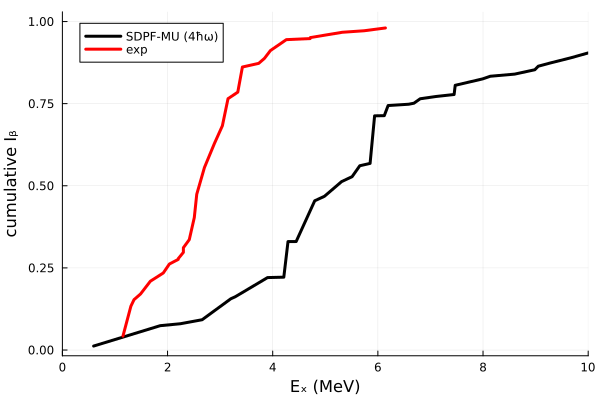

In [8]:
plot(bgtsorted[bgtsorted[:,1].-Ex29Ne3n.<QbSM,1].-Ex29Ne3n ,cumsum(Iᵦ[:,2]),xlims=(0,10),
xlabel="Eₓ (MeV)",ylabel="cumulative Iᵦ",label="SDPF-MU (4ħω)",color=:black,lw=3)
plot!(data[sortperm(data[:,1]),1]/1000.,cumsum(data[sortperm(data[:,1]),2]/100.),
linecolor=:red,color=:red,lw=3,
label="exp")

## USDB BGT



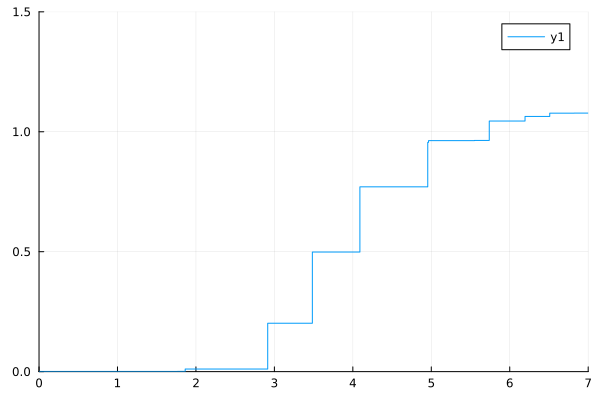

In [9]:
bgt3pUSDB = readdlm("data/log_Ne29_F29_usdb_tr_j3p_j5p.txt",comments=true,comment_char='#')
bgt5pUSDB = readdlm("data/log_Ne29_F29_usdb_tr_j5p_j5p.txt",comments=true,comment_char='#')
bgt7pUSDB = readdlm("data/log_Ne29_F29_usdb_tr_j7p_j5p.txt",comments=true,comment_char='#')

bgtUSDB=[ 
    bgt3pUSDB[:,3] bgt3pUSDB[:,10].*quenching 
    bgt5pUSDB[:,3] bgt5pUSDB[:,10].*quenching 
    bgt7pUSDB[:,3] bgt7pUSDB[:,10].*quenching 
    ]

bgtUSDBsorted = bgtUSDB[sortperm(bgtUSDB[:,1]),:];

plot(bgtUSDBsorted[:,1].-bgtUSDBsorted[1,1],cumsum(bgtUSDBsorted[:,2]),seriestype=:step,
xlims=(0,7),ylims=(0,1.5))



## Experimental BGT and paper plot

Now we read the experimental BGT from James' file

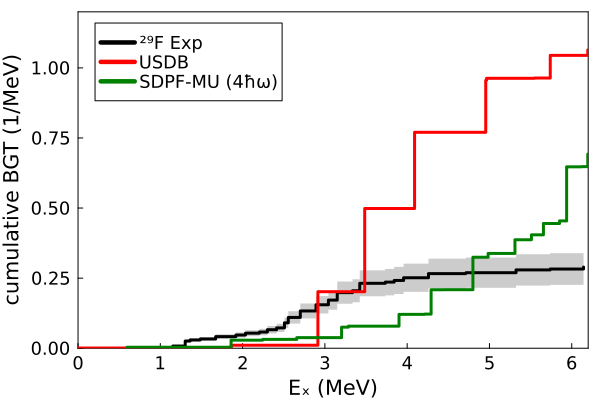

In [10]:
plot(expbgt[:,1],cumsum(expbgt[:,2]),seriestype=:step,
lw=3,label="²⁹F Exp",lcolor=:black,xlims=(0,6.2),
ribbon=(cumsum(expbgt[:,2]*0.2)),fillcolor=:black,fillalpha=0.2,
guidefont=14,tickfont=12,legendfont=12,grid=false,framestyle=:box)

plot!(bgtUSDBsorted[:,1].-bgtUSDBsorted[1,1],cumsum(bgtUSDBsorted[:,2]),
lw=3,lcolor=:red,seriestype=:step,
label="USDB",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",legend=:topleft,ylims=(0,0.72))

plot!(bgtsorted[:,1].-Ex29Ne3n,cumsum(bgtsorted[:,2]),
lw=3,lcolor=:green,seriestype=:step,
label="SDPF-MU (4ħω)",xlabel="Eₓ (MeV)",ylabel="cumulative BGT (1/MeV)",legend=:topleft,ylims=(0,1.2))

